In [1]:
from collections import Counter
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
file= "alldata.csv"

In [2]:
df = pd.read_csv(file)

In [3]:
df=df.dropna(how='all')

In [4]:
# droppping reviews column
del df['reviews']
# del df['description']

In [5]:
#sorting out location
df['location2'] = df['location'].str.replace(r'\d+','')
df['location2'] = df['location2'].str.strip()
# df

In [6]:
# running our 'query' through the position column, marking found words as true
try:
  df = df.rename(columns={"positiontxt":"position"})
  df['position'] = df[df['position'].str.contains('data|science|database|analytics|statistician|machine learning|business intelligence',
                                                  flags=re.IGNORECASE, regex=True)]

except AttributeError:
  print("stupid error makes no sense")


# df.count()


In [7]:
df['position']
df = df.dropna(how='any')
# df['position']

In [17]:
newdf = df[['company', 'position']].copy()
newdf['Counts'] = df.groupby(['company'])['position'].transform('count')

newdfclean = newdf.drop(newdf[newdf.Counts < 33].index)
newdfclean
newdfclean.loc[df.position.str.contains('analyst', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('analysis', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('analytics', case=False), 'Job Type'] = 'Analyst'
newdfclean.loc[df.position.str.contains('machine learning', case=False), 'Job Type'] = 'Machine Learning'
newdfclean.loc[df.position.str.contains('engineering', case=False), 'Job Type'] = 'Engineer'
newdfclean.loc[df.position.str.contains('engineer', case=False), 'Job Type'] = 'Engineer'
newdfclean.loc[df.position.str.contains('data science', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('data scientist', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('applied scientist', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('applied science', case=False), 'Job Type'] = 'Data Scientist'
newdfclean.loc[df.position.str.contains('sales', case=False), 'Job Type'] = 'Business Intelligence'
newdfclean.loc[df.position.str.contains('business intelligence', case=False), 'Job Type'] = 'Business Intelligence'

newdfclean.sort_values('Counts', ascending=False)
newdfclean.Counts.unique()


array([ 62, 157,  68,  33,  58], dtype=int64)

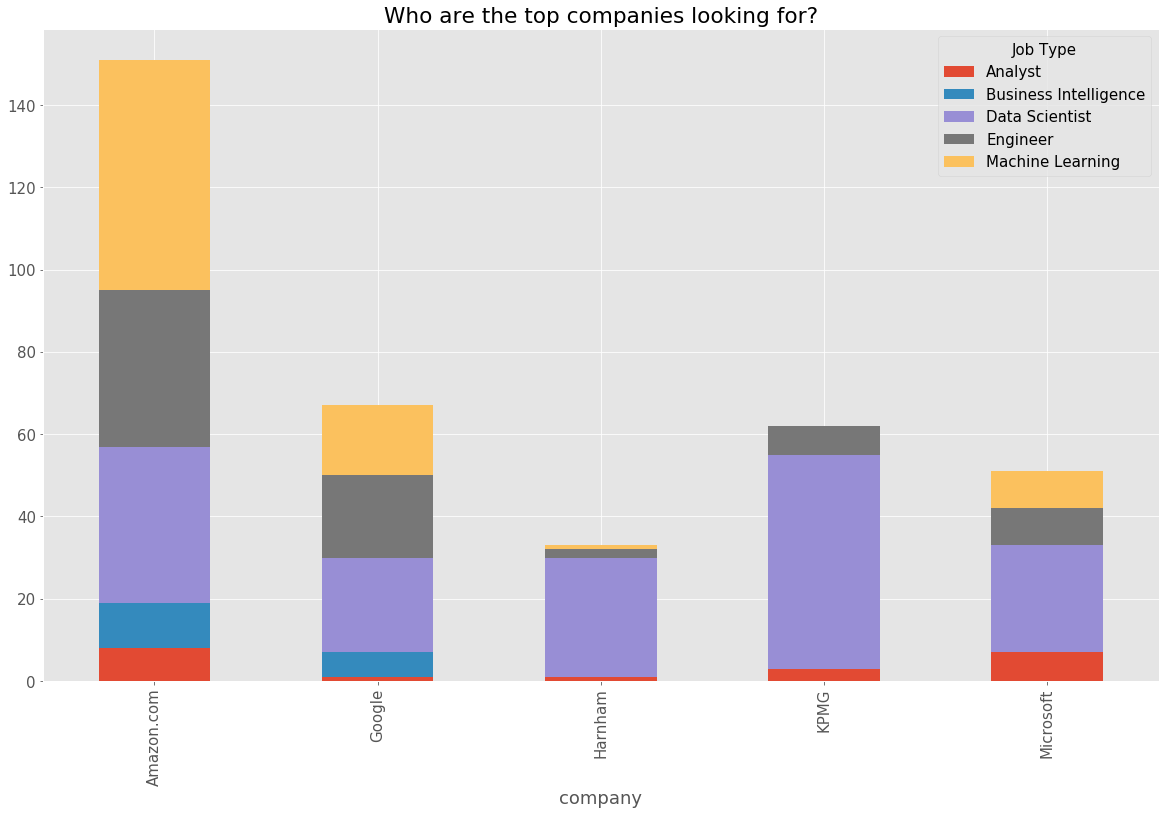

In [21]:

# newdfclean.groupby(['company', 'jobtype']).size().unstack().plot(kind='bar', stacked=True, 
#                 figsize=(20,10),title="Positions requested from Top Companies")
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 15})
bplot= newdfclean.groupby(['company', 'Job Type']).size().unstack()
bplot.plot(kind='bar',stacked=True, figsize=(20,12), title="Who are the top companies looking for?")
# plt.legend(loc=1, fontsize = 'small')
plt.savefig('topcompanyjobs.png')

In [ ]:
# aesthetics cover for our powerpoint presentation

# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.pyplot as plt
# text = df.position.values
# wordcloud = WordCloud(
#     width = 4000,
#     height = 3000,
#     background_color = 'black',
#     stopwords = STOPWORDS).generate(str(text))
# fig = plt.figure(
#     figsize = (40, 30),
#     facecolor = 'k',
#     edgecolor = 'k')
# plt.imshow(wordcloud, interpolation = 'bilinear')
# plt.axis('off')
# plt.tight_layout(pad=0)
# plt.savefig('powerpointcover.png')

In [ ]:
# # adding a new column using our 'query' name as the new position title
# df.loc[df.positiontxt.str.contains('analytics', case=False), 'broadpos'] = 'Analyst'
# df.loc[df.positiontxt.str.contains('statistician', case=False), 'broadpos'] = 'Statistician'
# df.loc[df.positiontxt.str.contains('machine learning', case=False), 'broadpos'] = 'Machine Learning'
# df.loc[df.positiontxt.str.contains('business intelligence', case=False), 'broadpos'] = 'Business Intelligence'
# df.loc[df.positiontxt.str.contains('science', case=False), 'broadpos'] = 'Science'
# df.loc[df.positiontxt.str.contains('database', case=False), 'broadpos'] = 'database'
# df.loc[df.positiontxt.str.contains('data', case=False), 'broadpos'] = 'data'

# df
